### **PROJECT 1**

### **PROBLEM STATEMENT**

Analysis of XYZ Co's sales data from 2014 to 2018 to identify key drivers of revenue and profit across products, sales channels, and regions. Uncover seasonal patterns and anomalies, and compare actual performance against budget targets. Use these insights to refine pricing strategies, promotional planning, and market expansion efforts, thus ensuring sustainable growth while minimizing reliance on a few markets or products.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Regional Sales Dataset.xlsx'
import pandas as pd

sheets = pd.ExcelFile(file_path)
print(sheets.sheet_names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Sales Orders', 'Customers', 'Regions', 'State Regions', 'Products', '2017 Budgets']


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sheets = pd.read_excel("Regional Sales Dataset.xlsx", sheet_name=None)
sheets = pd.read_excel(file_path)
print(sheets)

        OrderNumber  OrderDate  Customer Name Index      Channel  \
0       SO - 000225 2014-01-01                  126    Wholesale   
1      SO - 0003378 2014-01-01                   96  Distributor   
2      SO - 0005126 2014-01-01                    8    Wholesale   
3      SO - 0005614 2014-01-01                   42       Export   
4      SO - 0005781 2014-01-01                   73    Wholesale   
...             ...        ...                  ...          ...   
64099  SO - 0007573 2018-02-28                   74    Wholesale   
64100  SO - 0007706 2018-02-28                   51       Export   
64101  SO - 0007718 2018-02-28                  136  Distributor   
64102  SO - 0008084 2018-02-28                  158  Distributor   
64103  SO - 0008654 2018-02-28                   22  Distributor   

      Currency Code Warehouse Code  Delivery Region Index  \
0               USD         AXW291                    364   
1               USD         AXW291                    488   


In [ ]:
#Assign dataframes to each sheets

sheets = pd.read_excel(file_path, sheet_name=None)

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_sales.shape

(64104, 12)

In [ ]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

print("df_sales shape: ", (df_sales.shape))
print("df_customers shape: ", (df_customers.shape))
print("df_products shape: ", (df_products.shape))
print("df_regions shape: ", (df_regions.shape))
print("df_state_reg shape: ", (df_state_reg.shape))
print("df_budgets shape: ", (df_budgets.shape))

df_sales shape:  (64104, 12)
df_customers shape:  (175, 2)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_reg shape:  (49, 3)
df_budgets shape:  (30, 2)


In [ ]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [ ]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [ ]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

# Fix column headers for State Regions sheet
new_header = df_state_reg.iloc[0]  # First row becomes column headers
df_state_reg.columns = new_header  # Assign new headers
df_state_reg = df_state_reg[1:].reset_index(drop=True)  # Remove header row from data

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [ ]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [ ]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [ ]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [ ]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


**DATA CLEANING AND WRANGLING**

In [ ]:
df_sales.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343


In [ ]:
#Merge With customers

df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [ ]:
#Merge with products

df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [ ]:
#Merge with Regions

df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
df = df.merge(
    df_state_reg[['State Code', 'Region']],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [ ]:
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

In [ ]:
df.to_csv('file.csv')

In [ ]:
#clean up redundant data

cols_to_drop = ['Customer Name Index', 'Index', 'id', 'State Code', 'area_code', 'population', 'land_area', 'water_area', 'households', 'time_zone', 'currency code', 'channel', 'warehouse code', 'median_income']
df = df.drop(columns=cols_to_drop,errors='ignore')

df.head(5)

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,...,Product Name,name,county,state_code,state,type,latitude,longitude,Region,2017 Budgets
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,...,Product 27,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,...,Product 20,Greenwood,Johnson County,IN,Indiana,City,39.61366,-86.10665,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,...,Product 26,Pleasanton,Alameda County,CA,California,City,37.66243,-121.87468,West,5685138.270
3,SO - 0005614,2014-01-01,Export,USD,AXW291,473,7,7,2338.3,16368.1,...,Product 7,Bloomington,Monroe County,IN,Indiana,City,39.16533,-86.52639,Midwest,889737.555
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,...,Product 8,Manchester,Hartford County,CT,Connecticut,Town,41.77524,-72.52443,Northeast,1085037.329


In [ ]:
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'channel', 'currency code',
       'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer index',
       'customer names', 'product name', 'name', 'county', 'state_code',
       'state', 'type', 'latitude', 'longitude', 'region', '2017 budgets'],
      dtype=object)

In [ ]:
# KEEP THE IMPORTANT COLUMNS AND DELETE THE COLUMNS THAT WE DON'T NEED

cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [ ]:
list(cols_to_keep)

['ordernumber',
 'orderdate',
 'customer names',
 'channel',
 'product name',
 'order quantity',
 'unit price',
 'line total',
 'total unit cost',
 'state_code',
 'county',
 'region',
 'latitude',
 'longitude',
 '2017 budgets']

In [ ]:
df.head(1)

,ordernumber,orderdate,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,line total,...,product name,name,county,state_code,state,type,latitude,longitude,region,2017 budgets
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,...,Product 27,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,South,964940.231


In [ ]:
#Rename the columns

df = df.rename(columns={
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_name',
    'product name': 'product_name',
    'unit price': 'unit_price',
    'line total': 'revenue',
    'total unit cost': 'cost',
    'state_code': 'state',
    'state': 'state_name',
    'latitude': 'lat',
    'longitude': 'lon',
    '2017 budgets': 'budgets'
}
)

df.head(1)

,order_number,order_date,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit_price,revenue,...,product_name,name,county,state,state_name,type,lat,lon,region,budgets
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,...,Product 27,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,South,964940.231


In [ ]:
#Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budgets'] = pd.NA

#line_total_revenue
df[['order_date', 'product_name', 'revenue', 'budgets']].tail(5)

,order_date,product_name,revenue,budgets
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [ ]:
df.to_csv('final.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   order_number               64104 non-null  object        
 1   order_date                 64104 non-null  datetime64[ns]
 2   channel                    64104 non-null  object        
 3   currency code              64104 non-null  object        
 4   warehouse code             64104 non-null  object        
 5   delivery region index      64104 non-null  int64         
 6   product description index  64104 non-null  int64         
 7   order quantity             64104 non-null  int64         
 8   unit_price                 64104 non-null  float64       
 9   revenue                    64104 non-null  float64       
 10  cost                       64104 non-null  float64       
 11  customer index             64104 non-null  int64         
 12  cust

**FEATURE ENGINEERING**

In [ ]:
df['total cost'] = df['order quantity'] + df['cost']

df ['profit'] = df['revenue'] - df['total cost']

df['profit_margin_pct'] = df['profit'] / df['revenue'] * 100

df.head(5)

,order_number,order_date,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit_price,revenue,...,state,state_name,type,lat,lon,region,budgets,total cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,...,GA,Georgia,City,32.08354,-81.09983,South,NaN,1830.343,13164.257,87.793319
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,...,IN,Indiana,City,39.61366,-86.10665,Midwest,NaN,1280.918,24587.782,95.048387
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,...,CA,California,City,37.66243,-121.87468,West,NaN,690.740,5178.460,88.231105
3,SO - 0005614,2014-01-01,Export,USD,AXW291,473,7,7,2338.3,16368.1,...,IN,Indiana,City,39.16533,-86.52639,Midwest,NaN,1035.852,15332.248,93.671520
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,...,CT,Connecticut,Town,41.77524,-72.52443,Northeast,NaN,1268.270,17062.930,93.081359


**EXPLORATORY DATA ANALYSIS**


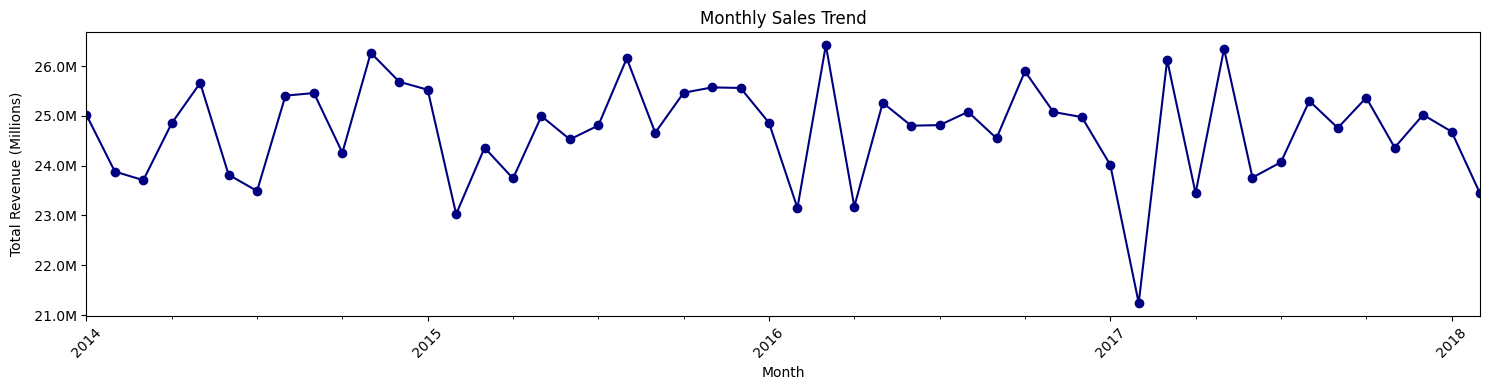

In [ ]:
df['order month'] = df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('order month')['revenue'].sum()
plt.figure(figsize = (15,4))

monthly_sales.plot(marker='o', color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f' {x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

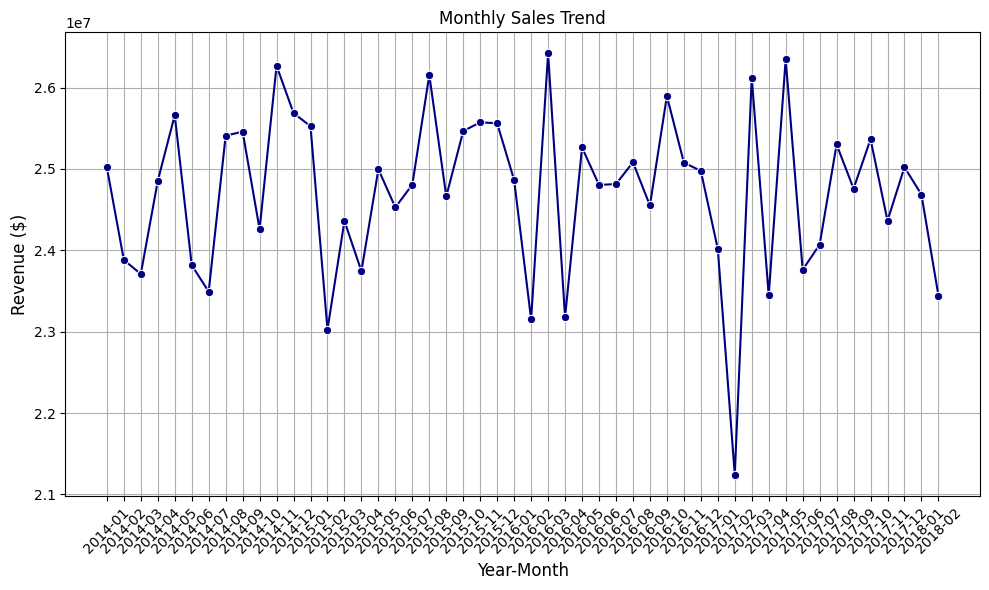

In [ ]:
#Assuming df is your DateFrame
#Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

#Extract year and month for grouping
df['year_month'] = df['order_date'].dt.to_period('M')

#Aggregate revenue by year_month
monthly_sales = df.groupby('year_month')['revenue'].sum().reset_index()

#Convert year_month back to string for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

#Create line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='year_month', y='revenue', marker='o', color='navy')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

#show the plot
plt.show()

In [ ]:
#Assuming df is your dataframe
#Convert order_date to datetime (if not already)

df['order_date'] = pd.to_datetime(df['order_date'])

#Remove records from January and February 2018
df_new = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]

/tmp/ipython-input-38-1346168707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
/tmp/ipython-input-38-1346168707.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.strftime('%B')


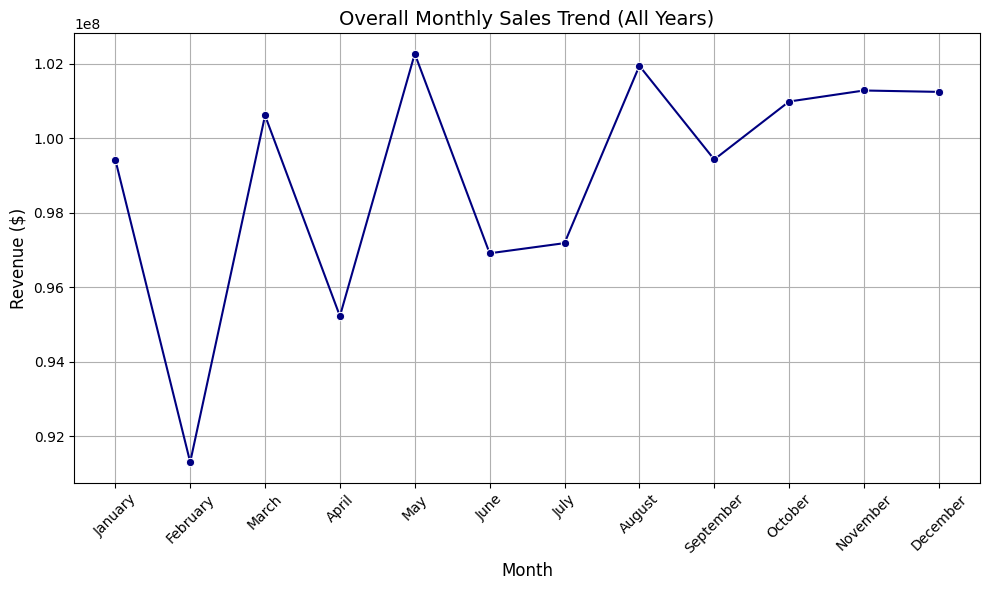

In [ ]:
#Assuming df is your dataframe
#Convert order_date to datetime (if not already)

df_new['order_date'] = pd.to_datetime(df_new['order_date'])

#Extract month time for grouping
df_new['month'] = df_new['order_date'].dt.strftime('%B')

#Aggregate revenue by month across all years
monthly_trend = df_new.groupby('month')['revenue'].sum().reset_index()

#Sort Months in Calendar Order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)

#Sort by month
monthly_trend = monthly_trend.sort_values('month')

#Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='month', y='revenue', marker='o', color='navy')
plt.title('Overall Monthly Sales Trend (All Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

#Show the Plot
plt.show()

In [ ]:
df.to_csv('final.csv')

/tmp/ipython-input-39-2922123470.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')


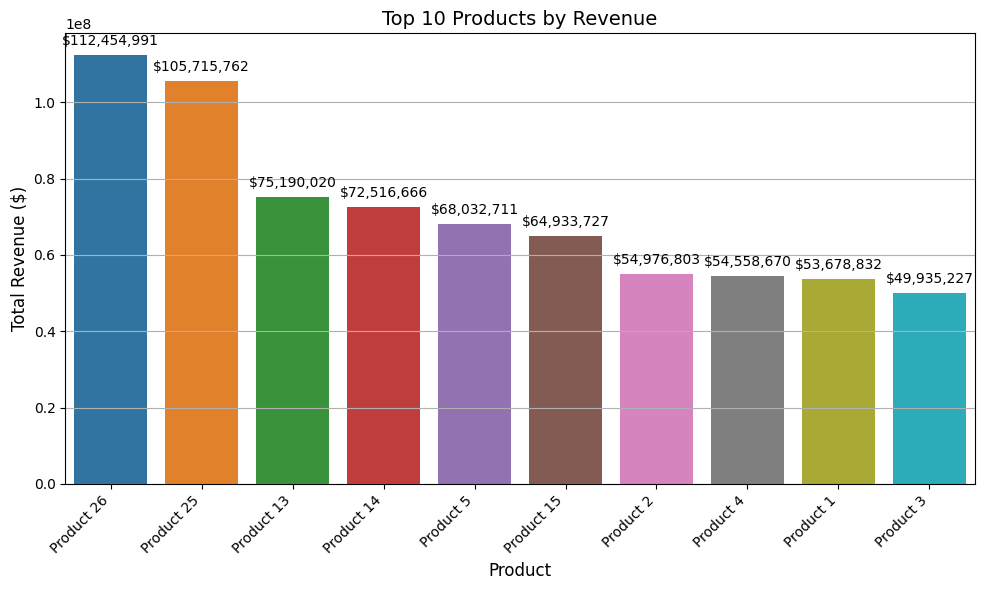

In [ ]:
#BAR CHART TO SHOW THE TOP 10 PRODUCTS BY REVENUE

#Assuming df is your DataFrame
#Aggregate revenue by product_name
# Group by product and sum revenue
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

# Get top 10 products by revenue
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)


# Prepare for Chart.js
labels = top_10_products['product_name'].tolist()
data = top_10_products['revenue'].tolist()

#Create the bar charts
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')

#Add labels on the top of each bar
for p in barplot.patches:
  barplot.annotate(f'${p.get_height():,.0f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'bottom', fontsize=10, color='black', xytext = (0, 5), textcoords = 'offset points')
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

#Show the plot
plt.show()

/tmp/ipython-input-40-2791242205.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')


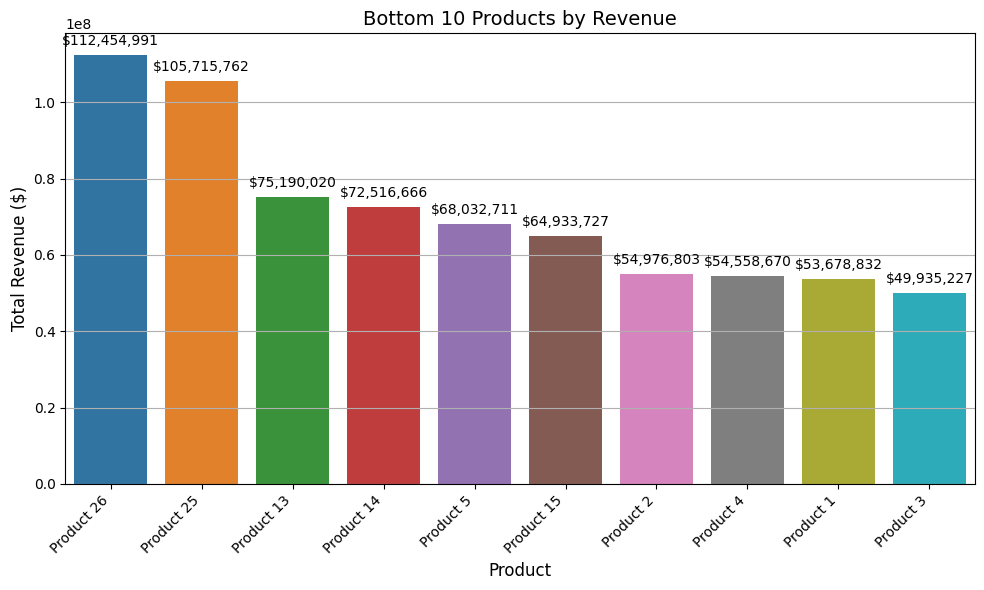

In [ ]:
#BAR CHART TO SHOW THE BOTTOM 10 PRODUCTS BY REVENUE

#Assuming df is your DataFrame
#Aggregate revenue by product_name
# Group by product and sum revenue
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

# Get top 10 products by revenue
bottom_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

#Create the bar charts
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')

#Add labels on the top of each bar
for p in barplot.patches:
  barplot.annotate(f'${p.get_height():,.0f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'bottom', fontsize=10, color='black', xytext = (0, 5), textcoords = 'offset points')
plt.title('Bottom 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

#Show the plot
plt.show()

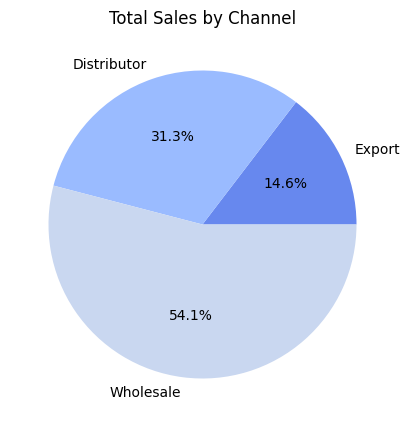

In [ ]:
#SALES BY CHANNEL

chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(5, 5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channel')

plt.show()

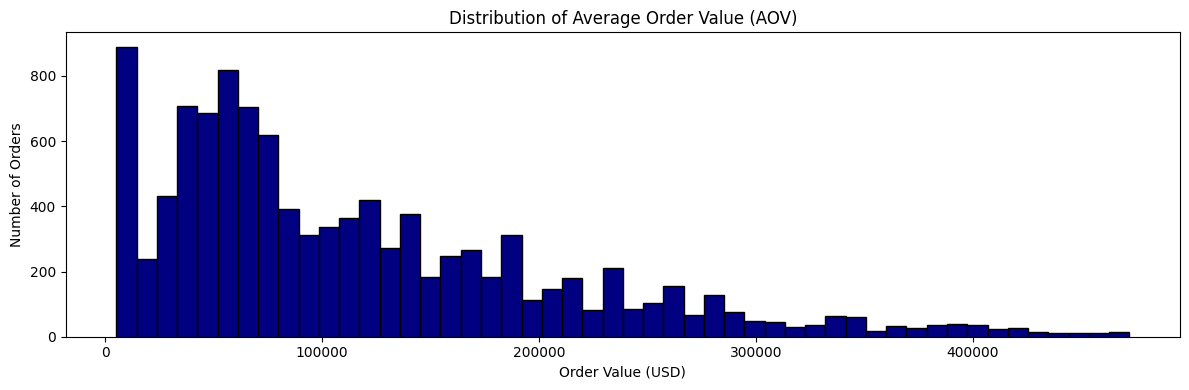

In [ ]:
#Average Order Value (AOV) Distribution

aov = df.groupby('order_number')['revenue'].sum()
plt.figure(figsize=(12,4))

plt.hist(
    aov,
    bins=50,
    color='navy',
    edgecolor='black'
)

plt.title('Distribution of Average Order Value (AOV)')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

/tmp/ipython-input-43-820165295.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x='product_name', y='unit_price', palette='tab10')


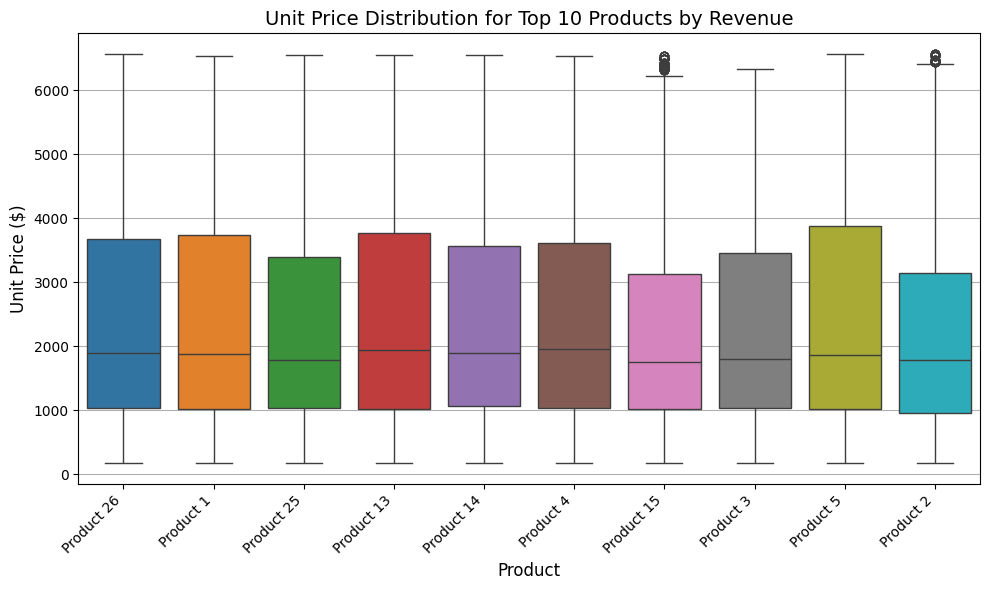

In [ ]:
# Unit Price Distribution Per Product

product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)['product_name'].tolist()

#Filter df to include only top 10 products
df_top_10 = df[df['product_name'].isin(top_10_products)]

#Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_10, x='product_name', y='unit_price', palette='tab10')
plt.title('Unit Price Distribution for Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Unit Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

#Show the Plot
plt.show()

/tmp/ipython-input-47-198044593.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot1 = sns.barplot(data=top_10_revenue, x='revenue', y='state_name', palette='tab10', ax=ax1)
/tmp/ipython-input-47-198044593.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot2 = sns.barplot(data=top_10_orders, x='order_count', y='state_name', palette='tab10', ax=ax2)


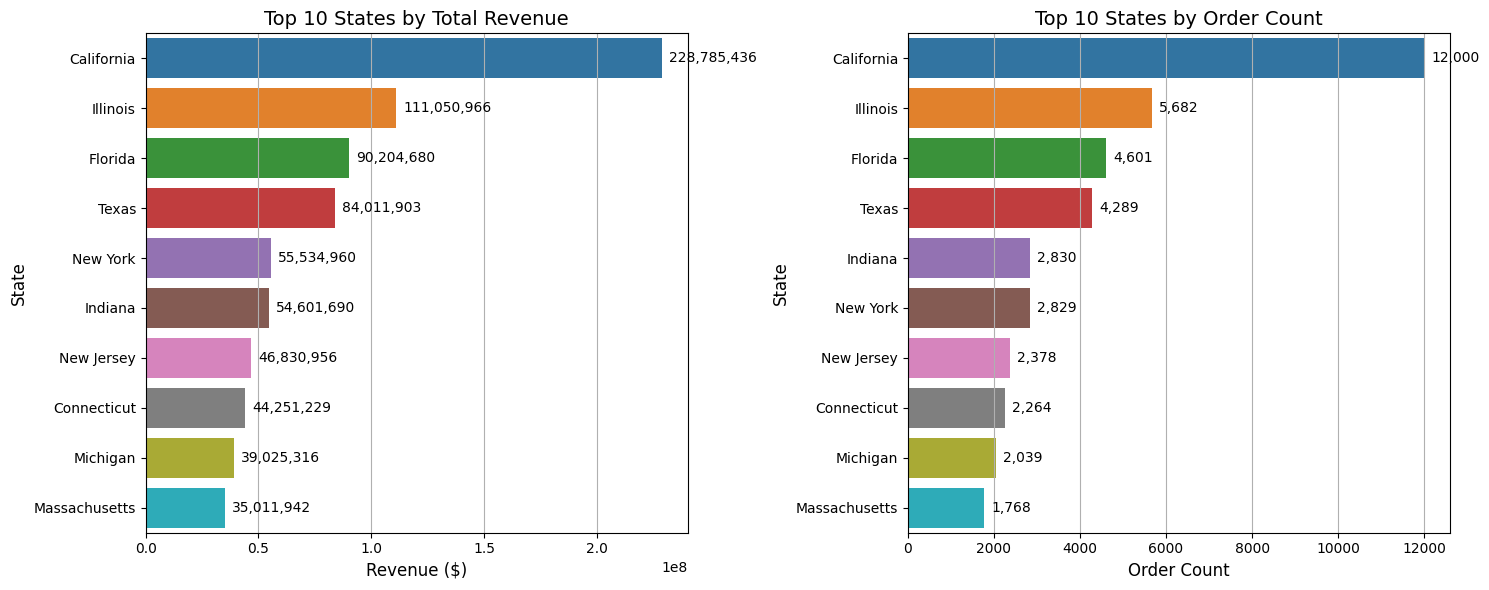

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group and aggregate
state_stats = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),
    order_count=('order_number', 'count')
).reset_index()

# Top 10 by revenue and order count
top_10_revenue = state_stats.sort_values(by='revenue', ascending=False).head(10)
top_10_orders = state_stats.sort_values(by='order_count', ascending=False).head(10)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Chart 1: Revenue
barplot1 = sns.barplot(data=top_10_revenue, x='revenue', y='state_name', palette='tab10', ax=ax1)
for p in barplot1.patches:
    ax1.annotate(f'{p.get_width():,.0f}',
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')
ax1.set_title('Top 10 States by Total Revenue', fontsize=14)
ax1.set_xlabel('Revenue ($)', fontsize=12)
ax1.set_ylabel('State', fontsize=12)
ax1.grid(True, axis='x')

# Chart 2: Order Count
barplot2 = sns.barplot(data=top_10_orders, x='order_count', y='state_name', palette='tab10', ax=ax2)
for p in barplot2.patches:
    ax2.annotate(f'{p.get_width():,.0f}',
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')
ax2.set_title('Top 10 States by Order Count', fontsize=14)
ax2.set_xlabel('Order Count', fontsize=12)
ax2.set_ylabel('State', fontsize=12)
ax2.grid(True, axis='x')

# Adjust layout
plt.tight_layout()
plt.show()

# Average Profit Margin by Channel
# Top and Bottom 10 Customers by Revenue
# Customer Segmentation: Revenue vs Profit Margin
# Correlation Heatmap